In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [2]:
df = pd.read_csv('WBK_credito.csv')
df.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [3]:
#df['Emprego'].mode()
df['Emprego'].fillna(3.0,inplace=True)
df['ResidenciaDesde'].fillna(4.0,inplace=True)
df['Habitacao'].fillna(1.0,inplace=True)

In [4]:
df.isnull().sum()

IDCREDITO               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
FiadorTerceiros         0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Status                  0
dtype: int64

In [5]:
#df['HistoricoCredito'].value_counts()
df.loc[df['HistoricoCredito'] == 0, 'HistoricoCredito'] = 2

In [6]:
#df['Profissao'].value_counts()
df.loc[df['Profissao'] == 999, 'Profissao'] = 4

In [7]:
df.drop(columns=['IDCREDITO'], inplace=True)

In [8]:
df

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,4,1,0,0,0
996,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,4,1,1,0,1
997,18,2,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,6,2,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [9]:
df['Status'].value_counts()

1    700
0    300
Name: Status, dtype: int64

-----------------------------------------------------------------

In [10]:
#criação de matrizes dos previsores e da classe
previsores = df.iloc[:,0:18]
classe = df.iloc[:,18]

In [11]:
#divisão da base de dados entre dados de treinamento(70%) e teste(30%)
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [12]:
#criando e treinando o modelo
nbg = GaussianNB()
nbg.fit(X_treinamento,Y_treinamento)

GaussianNB()

In [13]:
#criando previsoes com os dados teste
previsoes = nbg.predict(X_teste)

In [14]:
confusao = confusion_matrix(Y_teste, previsoes)
confusao

array([[ 40,  35],
       [ 44, 181]], dtype=int64)

In [15]:
taxa_acerto = accuracy_score(Y_teste, previsoes)
taxa_acerto

0.7366666666666667

In [16]:
#taxa de inadimplência
#taxa_inad = FN/(FN + TN)
taxa_inad = 35/(35 + 181)
print(round(taxa_inad*100, 2), '%')

16.2 %


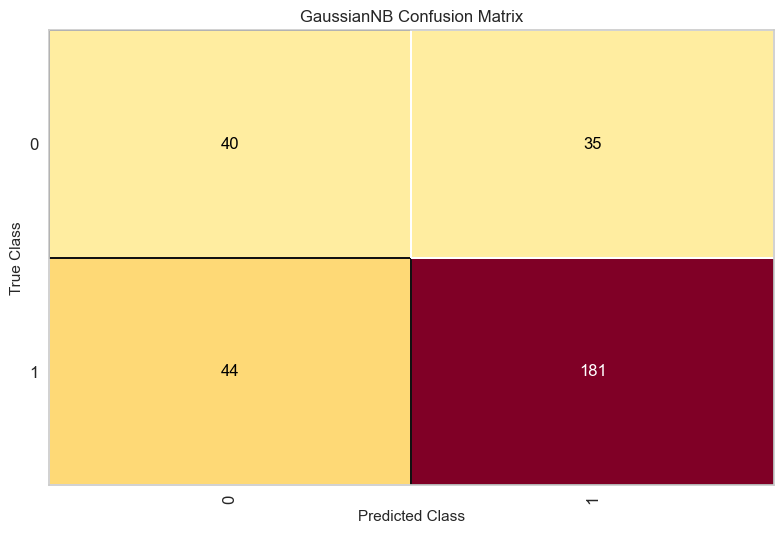

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento,Y_treinamento)
v.score(X_teste,Y_teste)
v.poof()